In [1]:
import os
import random
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
from torchvision.transforms import RandomHorizontalFlip, RandomVerticalFlip

In [2]:

# Define transformations
hor_flip = RandomHorizontalFlip(p=1)
ver_flip = RandomVerticalFlip(p=1)

def apply_transformations(image):
    """Applies a set of transformations to an image."""
    
    # Random horizontal flip
    if random.random() > 0.5:
        image = hor_flip(image)

    # Random vertical flip
    if random.random() > 0.5:
        image = ver_flip(image)

    # Adjust sharpness randomly
    sharpness_factor = random.uniform(1.1, 2.0)  # 1 = no change
    image = TF.adjust_sharpness(image, sharpness_factor)

    # Apply Gaussian blur
    sigma = random.uniform(0.1, 1)  # Randomly choose sigma in range [0.1, 1]
    image = TF.gaussian_blur(image, kernel_size=5, sigma=sigma)

    # Apply random rotations
    if random.random() > 0.5:
        image = TF.rotate(image, angle=90, fill=0)
    elif random.random() > 0.5:
        image = TF.rotate(image, angle=270, fill=0)

    return image

def process_images(image_dir, save_augmented=False):
    """Reads TIFF images, applies transformations, and displays original vs augmented."""
    for root, _, files in os.walk(image_dir): 
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF and TIF files
                img_path = os.path.join(root, file)

                # Read the image
                original_image = tiff.imread(img_path)

                # Normalize image for visualization
                img_display = (original_image - original_image.min()) / (original_image.max() - original_image.min())

                # Apply transformations
                augmented_image = apply_transformations(original_image)

                # Display original vs augmented
                fig, axes = plt.subplots(1, 2, figsize=(10, 5))
                axes[0].imshow(img_display, cmap='gray')
                axes[0].set_title("Original Image")
                axes[0].axis("off")

                axes[1].imshow(augmented_image, cmap='gray')
                axes[1].set_title("Augmented Image")
                axes[1].axis("off")

                plt.show()

                # Save augmented image if needed
                #if save_augmented:
                    #save_path = os.path.join(root, f"aug_{file}")
                    #tiff.imwrite(save_path, augmented_image.astype(np.uint16))

# Example usage
image_dir = "G:\test"
process_images(image_dir, save_augmented=True)

<>:66: SyntaxWarning: invalid escape sequence '\s'
<>:66: SyntaxWarning: invalid escape sequence '\s'
C:\Users\k54739\AppData\Local\Temp\ipykernel_14384\858271300.py:66: SyntaxWarning: invalid escape sequence '\s'
  image_dir = "G:\sd_only"
C:\Users\k54739\AppData\Local\Temp\ipykernel_14384\858271300.py:66: SyntaxWarning: invalid escape sequence '\s'
  image_dir = "G:\sd_only"


TypeError: img should be PIL Image. Got <class 'numpy.ndarray'>

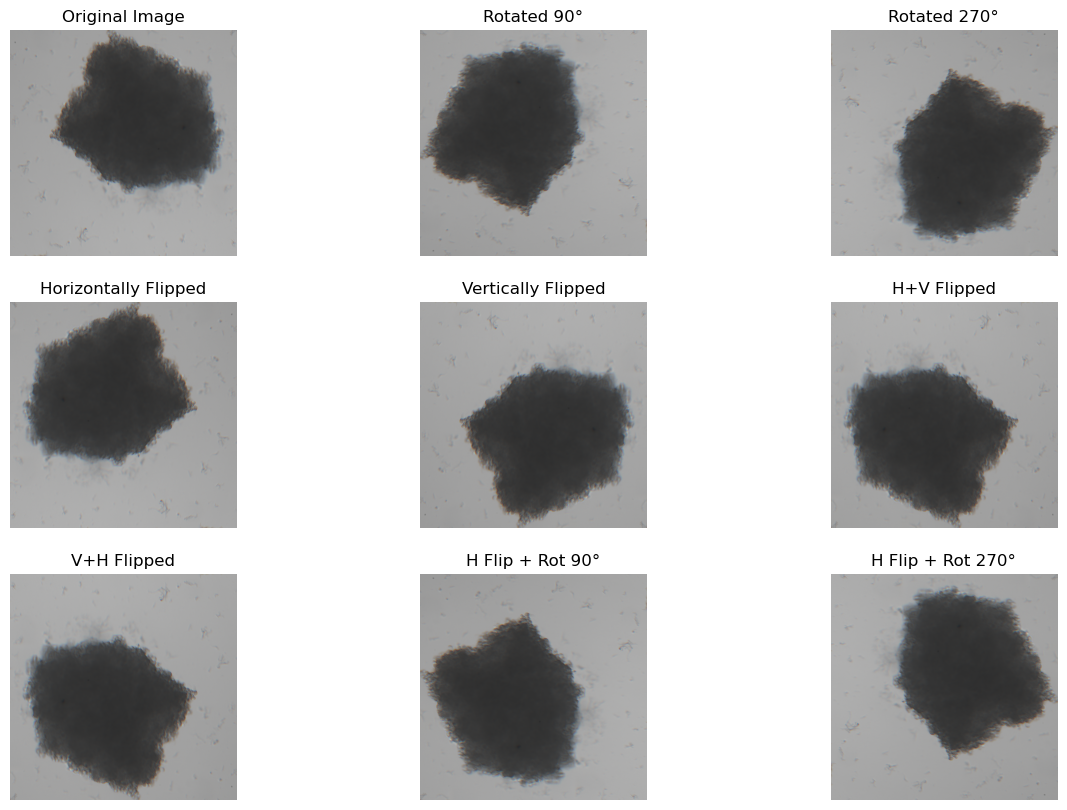

In [6]:
import os
import random
import numpy as np
import tifffile as tiff
import torch
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

def apply_transformations(img_tensor):
    """Applies transformations on the image tensor."""
    
    # Fixed rotation angles
    fixed_angle = 90
    angle_fixed = 270

    # Apply transformations
    rotated_img_tensor = F.rotate(img_tensor, angle=fixed_angle, fill=0)
    rot_img_tensor = F.rotate(img_tensor, angle=angle_fixed, fill=0)
    hflipped_img_tensor = F.hflip(img_tensor)
    vflipped_img_tensor = F.vflip(img_tensor)
    hv_flipped_img_tensor = F.vflip(F.hflip(img_tensor))
    vh_flipped_img_tensor = F.hflip(F.vflip(img_tensor))

    # Apply horizontal flip and then rotate 90 degrees
    hf_rot_img_tensor = F.rotate(F.hflip(img_tensor), angle=90, fill=0)

    # Apply horizontal flip and then rotate 270 degrees
    hf_rot_270_img_tensor = F.rotate(F.hflip(img_tensor), angle=270, fill=0)

    return {
        "Rotated 90°": rotated_img_tensor.numpy(),
        "Rotated 270°": rot_img_tensor.numpy(),
        "Horizontally Flipped": hflipped_img_tensor.numpy(),
        "Vertically Flipped": vflipped_img_tensor.numpy(),
        "H+V Flipped": hv_flipped_img_tensor.numpy(),
        "V+H Flipped": vh_flipped_img_tensor.numpy(),
        "H Flip + Rot 90°": hf_rot_img_tensor.numpy(),
        "H Flip + Rot 270°": hf_rot_270_img_tensor.numpy(),
    }

def process_images(image_dir):
    """Reads images from a folder, applies transformations, and displays results."""
    for root, _, files in os.walk(image_dir): 
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF files
                img_path = os.path.join(root, file)

                # Read image and normalize to [0, 1]
                img = tiff.imread(img_path).astype(np.float32) / 65535.0  

                # Convert to PyTorch tensor
                img_tensor = torch.tensor(img)

                # Apply transformations
                augmented_images = apply_transformations(img_tensor)

                # Display original vs augmented
                plt.figure(figsize=(15, 10))
                
                # Original Image
                plt.subplot(3, 3, 1)
                plt.title("Original Image")
                plt.imshow(img_tensor.numpy().transpose(1, 2, 0))  # Change (C, H, W) -> (H, W, C)

                plt.axis("off")

                # Augmented images
                for i, (title, aug_img) in enumerate(augmented_images.items(), start=2):
                    plt.subplot(3, 3, i)
                    plt.title(title)
                    plt.imshow(np.moveaxis(aug_img, 0, -1))  # Moves (C, H, W) → (H, W, C)

                    plt.axis("off")

                plt.show()
                return
# Example usage
image_dir = r"G:\test"
process_images(image_dir)


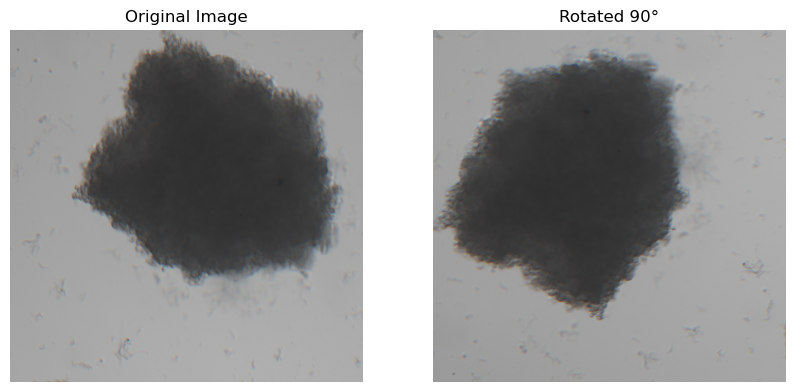

In [7]:
import os
import numpy as np
import tifffile as tiff
import torch
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

def apply_transformation(img_tensor):
    """Applies only the 90° rotation on the image tensor."""
    rotated_img_tensor = F.rotate(img_tensor, angle=90, fill=0)
    return rotated_img_tensor.numpy()

def process_images(image_dir):
    """Reads the first image from a folder, applies 90° rotation, and displays results."""
    for root, _, files in os.walk(image_dir): 
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF files
                img_path = os.path.join(root, file)

                # Read image and normalize to [0, 1]
                img = tiff.imread(img_path).astype(np.float32) / 65535.0  

                # Convert to PyTorch tensor
                img_tensor = torch.tensor(img)

                # Apply transformation
                rotated_img = apply_transformation(img_tensor)

                # Display original vs rotated image
                plt.figure(figsize=(10, 5))

                # Original Image
                plt.subplot(1, 2, 1)
                plt.title("Original Image")
                plt.imshow(img_tensor.numpy().transpose(1, 2, 0))  # (C, H, W) -> (H, W, C)
                plt.axis("off")

                # Rotated Image
                plt.subplot(1, 2, 2)
                plt.title("Rotated 90°")
                plt.imshow(np.moveaxis(rotated_img, 0, -1))  # (C, H, W) -> (H, W, C)
                plt.axis("off")

                plt.show()
                return  # Stops after processing the first image

# Example usage
image_dir = r"G:\test"
process_images(image_dir)


import os
import numpy as np
import tifffile as tiff
import torch
import torchvision.transforms.functional as F

def apply_transformation(img_tensor):
    """Applies only the 90° rotation on the image tensor."""
    rotated_img_tensor = F.rotate(img_tensor, angle=90, fill=0)
    return rotated_img_tensor.numpy()

def process_images(image_dir, save_augmented=True):
    """Reads TIFF images from a folder, applies 90° rotation, and saves the result."""
    for root, _, files in os.walk(image_dir): 
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF files
                img_path = os.path.join(root, file)

                # Read image while preserving original bit-depth
                img = tiff.imread(img_path)

                # Convert to PyTorch tensor
                img_tensor = torch.tensor(img.astype(np.float32))

                # Apply transformation
                rotated_img = apply_transformation(img_tensor)

                # Convert back to original bit-depth
                rotated_img = rotated_img.astype(img.dtype)

                # Save augmented image
                if save_augmented:
                    save_path = os.path.join(root, f"aug_{file}")
                    tiff.imwrite(save_path, rotated_img)
                    print(f"Saved rotated image: {save_path}")

                return  # Stops after processing the first image

# Example usage
image_dir = r"G:\test"
process_images(image_dir, save_augmented=True)


import os
import numpy as np
import tifffile as tiff
import torch
import torchvision.transforms.functional as F

def apply_transformation(img_tensor):
    """Applies only the 90° rotation on the image tensor."""
    rotated_img_tensor = F.rotate(img_tensor, angle=90, fill=0)
    return rotated_img_tensor.numpy()

def process_images(image_dir, target_dir, save_augmented=True):
    """Reads TIFF images from a folder, applies 90° rotation, and saves the result in target_dir."""
    
    # Ensure target directory exists
    os.makedirs(target_dir, exist_ok=True)

    for root, _, files in os.walk(image_dir): 
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF files
                img_path = os.path.join(root, file)

                # Read image while preserving original bit-depth
                img = tiff.imread(img_path)

                # Convert to PyTorch tensor
                img_tensor = torch.tensor(img.astype(np.float32))

                # Apply transformation
                rotated_img = apply_transformation(img_tensor)

                # Convert back to original bit-depth
                rotated_img = rotated_img.astype(img.dtype)

                # Define save path in target directory
                save_path = os.path.join(target_dir, f"aug_{file}")

                # Save augmented image
                if save_augmented:
                    tiff.imwrite(save_path, rotated_img)
                    print(f"Saved rotated image: {save_path}")

                return  # Stops after processing the first image

# Example usage
image_dir = r"G:\test"
target_dir = r"G:\test_aug"
process_images(image_dir, target_dir, save_augmented=True)


import os
import numpy as np
import random
import torch
import torchvision.transforms.functional as F
import torchvision.transforms.functional as TF
import tifffile as tiff

def apply_transformation(img_tensor):
    """Applies only the 90° rotation on the image tensor."""
    rotated_img_tensor = F.rotate(img_tensor, angle=90, fill=0)
    return rotated_img_tensor.numpy()

def process_images(image_dir, target_dir, save_augmented=True):
    """Reads TIFF images from a folder, applies transformations, and saves the result in target_dir."""
    
    # Ensure target directory exists
    os.makedirs(target_dir, exist_ok=True)

    for root, _, files in os.walk(image_dir): 
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF files
                img_path = os.path.join(root, file)

                # Read image while preserving original bit-depth
                img = tiff.imread(img_path)

                # Convert to PyTorch tensor and normalize to [0, 1]
                img_tensor = torch.tensor(img.astype(np.float32)) / 65535.0

                # Apply transformations
                transformed_img = apply_transformation(img_tensor)

                # Convert back to original bit-depth by scaling back to [0, 65535]
                transformed_img = (transformed_img * 65535.0).astype(np.uint16)

                # Define save path in target directory
                save_path = os.path.join(target_dir, f"aug_{file}")

                # Save augmented image
                if save_augmented:
                    tiff.imwrite(save_path, transformed_img)
                    print(f"Saved augmented image: {save_path}")

                return  # Stops after processing the first image

# Example usage
image_dir = r"G:\test"
target_dir = r"G:\test_aug"
process_images(image_dir, target_dir, save_augmented=True)


In [ ]:
import os
import numpy as np
import random
import torch
import torchvision.transforms.functional as F
import torchvision.transforms.functional as TF
import tifffile as tiff

1

In [36]:


def apply_transformation(img_tensor):
    """Applies a chain of transformations on the image tensor."""
    
    # Apply vertical flip (always applied)
    img_tensor = F.vflip(img_tensor)
    
    # Apply horizontal flip (always applied)
    img_tensor = F.hflip(img_tensor)
    
    # Adjust sharpness (random factor between 1.1 and 2.0)
    sharpness_factor = random.uniform(1.1, 2.0)
    img_tensor = TF.adjust_sharpness(img_tensor, sharpness_factor)
    
    # Apply Gaussian blur (random sigma between 0.1 and 1.0)
    sigma = random.uniform(0.1, 1.0)
    img_tensor = TF.gaussian_blur(img_tensor, kernel_size=5, sigma=sigma)
    
    return img_tensor.numpy()

def process_images(image_dir, target_dir, save_augmented=True):
    """Reads TIFF images from a folder, applies transformations, and saves the result in target_dir."""
    
    # Ensure target directory exists
    os.makedirs(target_dir, exist_ok=True)

    for root, _, files in os.walk(image_dir): 
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF files
                img_path = os.path.join(root, file)

                # Read image while preserving original bit-depth
                img = tiff.imread(img_path)

                # Convert to PyTorch tensor and normalize to [0, 1]
                img_tensor = torch.tensor(img.astype(np.float32)) / 65535.0

                # Apply transformations
                transformed_img = apply_transformation(img_tensor)

                # Convert back to original bit-depth by scaling back to [0, 65535]
                transformed_img = (transformed_img * 65535.0).astype(np.uint16)

                # Define save path in target directory
                save_path = os.path.join(target_dir, f"hvflips_{file}")

                # Save augmented image
                if save_augmented:
                    tiff.imwrite(save_path, transformed_img)
                    print(f"Saved augmented image: {save_path}")

                #return  # Stops after processing the first image

# Example usage
image_dir = r"G:\sd_only"
target_dir = r"G:\test_aug"
process_images(image_dir, target_dir, save_augmented=True)


Saved augmented image: G:\test_aug\hvflips_RBT04_B07-T01.tiff
Saved augmented image: G:\test_aug\hvflips_RBT04_B08-T01.tiff
Saved augmented image: G:\test_aug\hvflips_RBT04_B09-T01.tiff
Saved augmented image: G:\test_aug\hvflips_RBT04_B10-T01.tiff
Saved augmented image: G:\test_aug\hvflips_RBT04_B11-T01.tiff
Saved augmented image: G:\test_aug\hvflips_RBT04_C07-T01.tiff
Saved augmented image: G:\test_aug\hvflips_RBT04_C08-T01.tiff
Saved augmented image: G:\test_aug\hvflips_RBT04_C09-T01.tiff
Saved augmented image: G:\test_aug\hvflips_RBT04_C10-T01.tiff
Saved augmented image: G:\test_aug\hvflips_RBT04_D07-T01.tiff
Saved augmented image: G:\test_aug\hvflips_RBT04_D08-T01.tiff
Saved augmented image: G:\test_aug\hvflips_RBT04_D09-T01.tiff
Saved augmented image: G:\test_aug\hvflips_RBT04_D10-T01.tiff
Saved augmented image: G:\test_aug\hvflips_RBT04_D11-T01.tiff
Saved augmented image: G:\test_aug\hvflips_RBT04_E07-T01.tiff
Saved augmented image: G:\test_aug\hvflips_RBT04_E08-T01.tiff
Saved au

2

In [39]:
import os
import numpy as np
import random
import torch
import torchvision.transforms.functional as F
import torchvision.transforms.functional as TF
import tifffile as tiff

def apply_transformation(img_tensor):
    """Applies a chain of transformations on the image tensor."""
    
    img_tensor = F.rotate(img_tensor, angle=90, fill=0)
    
    # Adjust sharpness (random factor between 1.1 and 2.0)
    sharpness_factor = random.uniform(1.1, 2.0)
    img_tensor = TF.adjust_sharpness(img_tensor, sharpness_factor)
    
    # Apply Gaussian blur (random sigma between 0.1 and 1.0)
    sigma = random.uniform(0.1, 1.0)
    img_tensor = TF.gaussian_blur(img_tensor, kernel_size=5, sigma=sigma)
    
    return img_tensor.numpy()

def process_images(image_dir, target_dir, save_augmented=True):
    """Reads TIFF images from a folder, applies transformations, and saves the result in target_dir."""
    
    # Ensure target directory exists
    os.makedirs(target_dir, exist_ok=True)

    for root, _, files in os.walk(image_dir): 
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF files
                img_path = os.path.join(root, file)

                # Read image while preserving original bit-depth
                img = tiff.imread(img_path)

                # Convert to PyTorch tensor and normalize to [0, 1]
                img_tensor = torch.tensor(img.astype(np.float32)) / 65535.0

                # Apply transformations
                transformed_img = apply_transformation(img_tensor)

                # Convert back to original bit-depth by scaling back to [0, 65535]
                transformed_img = (transformed_img * 65535.0).astype(np.uint16)

                # Define save path in target directory
                save_path = os.path.join(target_dir, f"r90_{file}")

                # Save augmented image
                if save_augmented:
                    tiff.imwrite(save_path, transformed_img)
                    print(f"Saved augmented image: {save_path}")

                #return  # Stops after processing the first image

# Example usage
image_dir = r"G:\sd_only"
target_dir = r"G:\test_aug"
process_images(image_dir, target_dir, save_augmented=True)


Saved augmented image: G:\test_aug\r90_RBT04_B07-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_B08-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_B09-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_B10-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_B11-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_C07-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_C08-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_C09-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_C10-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_D07-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_D08-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_D09-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_D10-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_D11-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_E07-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_E08-T01.tiff
Saved augmented image: G:\test_aug\r90_RBT04_E09-T01.tiff
Saved augmente

3

In [40]:
import os
import numpy as np
import random
import torch
import torchvision.transforms.functional as F
import torchvision.transforms.functional as TF
import tifffile as tiff

def apply_transformation(img_tensor):
    """Applies a chain of transformations on the image tensor."""
    
    img_tensor = F.rotate(img_tensor, angle=270, fill=0)
    
    # Adjust sharpness (random factor between 1.1 and 2.0)
    sharpness_factor = random.uniform(1.1, 2.0)
    img_tensor = TF.adjust_sharpness(img_tensor, sharpness_factor)
    
    # Apply Gaussian blur (random sigma between 0.1 and 1.0)
    sigma = random.uniform(0.1, 1.0)
    img_tensor = TF.gaussian_blur(img_tensor, kernel_size=5, sigma=sigma)
    
    return img_tensor.numpy()

def process_images(image_dir, target_dir, save_augmented=True):
    """Reads TIFF images from a folder, applies transformations, and saves the result in target_dir."""
    
    # Ensure target directory exists
    os.makedirs(target_dir, exist_ok=True)

    for root, _, files in os.walk(image_dir): 
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF files
                img_path = os.path.join(root, file)

                # Read image while preserving original bit-depth
                img = tiff.imread(img_path)

                # Convert to PyTorch tensor and normalize to [0, 1]
                img_tensor = torch.tensor(img.astype(np.float32)) / 65535.0

                # Apply transformations
                transformed_img = apply_transformation(img_tensor)

                # Convert back to original bit-depth by scaling back to [0, 65535]
                transformed_img = (transformed_img * 65535.0).astype(np.uint16)

                # Define save path in target directory
                save_path = os.path.join(target_dir, f"r270_{file}")

                # Save augmented image
                if save_augmented:
                    tiff.imwrite(save_path, transformed_img)
                    print(f"Saved augmented image: {save_path}")

                #return  # Stops after processing the first image

# Example usage
image_dir = r"G:\sd_only"
target_dir = r"G:\test_aug"
process_images(image_dir, target_dir, save_augmented=True)


Saved augmented image: G:\test_aug\r270_RBT04_B07-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_B08-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_B09-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_B10-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_B11-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_C07-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_C08-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_C09-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_C10-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_D07-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_D08-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_D09-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_D10-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_D11-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_E07-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_E08-T01.tiff
Saved augmented image: G:\test_aug\r270_RBT04_E09-T01.ti

4

In [41]:
import os
import numpy as np
import random
import torch
import torchvision.transforms.functional as F
import torchvision.transforms.functional as TF
import tifffile as tiff

def apply_transformation(img_tensor):
    """Applies a chain of transformations on the image tensor."""
    
    img_tensor = F.hflip(img_tensor)
    img_tensor = F.rotate(img_tensor, angle=270, fill=0)
    
    # Adjust sharpness (random factor between 1.1 and 2.0)
    sharpness_factor = random.uniform(1.1, 2.0)
    img_tensor = TF.adjust_sharpness(img_tensor, sharpness_factor)
    
    # Apply Gaussian blur (random sigma between 0.1 and 1.0)
    sigma = random.uniform(0.1, 1.0)
    img_tensor = TF.gaussian_blur(img_tensor, kernel_size=5, sigma=sigma)
    
    return img_tensor.numpy()

def process_images(image_dir, target_dir, save_augmented=True):
    """Reads TIFF images from a folder, applies transformations, and saves the result in target_dir."""
    
    # Ensure target directory exists
    os.makedirs(target_dir, exist_ok=True)

    for root, _, files in os.walk(image_dir): 
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF files
                img_path = os.path.join(root, file)

                # Read image while preserving original bit-depth
                img = tiff.imread(img_path)

                # Convert to PyTorch tensor and normalize to [0, 1]
                img_tensor = torch.tensor(img.astype(np.float32)) / 65535.0

                # Apply transformations
                transformed_img = apply_transformation(img_tensor)

                # Convert back to original bit-depth by scaling back to [0, 65535]
                transformed_img = (transformed_img * 65535.0).astype(np.uint16)

                # Define save path in target directory
                save_path = os.path.join(target_dir, f"hflipr270_{file}")

                # Save augmented image
                if save_augmented:
                    tiff.imwrite(save_path, transformed_img)
                    print(f"Saved augmented image: {save_path}")

                #return  # Stops after processing the first image

# Example usage
image_dir = r"G:\sd_only"
target_dir = r"G:\test_aug"
process_images(image_dir, target_dir, save_augmented=True)


Saved augmented image: G:\test_aug\hflipr270_RBT04_B07-T01.tiff
Saved augmented image: G:\test_aug\hflipr270_RBT04_B08-T01.tiff
Saved augmented image: G:\test_aug\hflipr270_RBT04_B09-T01.tiff
Saved augmented image: G:\test_aug\hflipr270_RBT04_B10-T01.tiff
Saved augmented image: G:\test_aug\hflipr270_RBT04_B11-T01.tiff
Saved augmented image: G:\test_aug\hflipr270_RBT04_C07-T01.tiff
Saved augmented image: G:\test_aug\hflipr270_RBT04_C08-T01.tiff
Saved augmented image: G:\test_aug\hflipr270_RBT04_C09-T01.tiff
Saved augmented image: G:\test_aug\hflipr270_RBT04_C10-T01.tiff
Saved augmented image: G:\test_aug\hflipr270_RBT04_D07-T01.tiff
Saved augmented image: G:\test_aug\hflipr270_RBT04_D08-T01.tiff
Saved augmented image: G:\test_aug\hflipr270_RBT04_D09-T01.tiff
Saved augmented image: G:\test_aug\hflipr270_RBT04_D10-T01.tiff
Saved augmented image: G:\test_aug\hflipr270_RBT04_D11-T01.tiff
Saved augmented image: G:\test_aug\hflipr270_RBT04_E07-T01.tiff
Saved augmented image: G:\test_aug\hflip

5

In [42]:
import os
import numpy as np
import random
import torch
import torchvision.transforms.functional as F
import torchvision.transforms.functional as TF
import tifffile as tiff

def apply_transformation(img_tensor):
    """Applies a chain of transformations on the image tensor."""
    
    img_tensor = F.hflip(img_tensor)
    img_tensor = F.rotate(img_tensor, angle=90, fill=0)
    
    # Adjust sharpness (random factor between 1.1 and 2.0)
    sharpness_factor = random.uniform(1.1, 2.0)
    img_tensor = TF.adjust_sharpness(img_tensor, sharpness_factor)
    
    # Apply Gaussian blur (random sigma between 0.1 and 1.0)
    sigma = random.uniform(0.1, 1.0)
    img_tensor = TF.gaussian_blur(img_tensor, kernel_size=5, sigma=sigma)
    
    return img_tensor.numpy()

def process_images(image_dir, target_dir, save_augmented=True):
    """Reads TIFF images from a folder, applies transformations, and saves the result in target_dir."""
    
    # Ensure target directory exists
    os.makedirs(target_dir, exist_ok=True)

    for root, _, files in os.walk(image_dir): 
        for file in files:
            if file.lower().endswith(('.tiff', '.tif')):  # Check for TIFF files
                img_path = os.path.join(root, file)

                # Read image while preserving original bit-depth
                img = tiff.imread(img_path)

                # Convert to PyTorch tensor and normalize to [0, 1]
                img_tensor = torch.tensor(img.astype(np.float32)) / 65535.0

                # Apply transformations
                transformed_img = apply_transformation(img_tensor)

                # Convert back to original bit-depth by scaling back to [0, 65535]
                transformed_img = (transformed_img * 65535.0).astype(np.uint16)

                # Define save path in target directory
                save_path = os.path.join(target_dir, f"hflipr90_{file}")

                # Save augmented image
                if save_augmented:
                    tiff.imwrite(save_path, transformed_img)
                    print(f"Saved augmented image: {save_path}")

                #return  # Stops after processing the first image

# Example usage
image_dir = r"G:\sd_only"
target_dir = r"G:\test_aug"
process_images(image_dir, target_dir, save_augmented=True)


Saved augmented image: G:\test_aug\hflipr90_RBT04_B07-T01.tiff
Saved augmented image: G:\test_aug\hflipr90_RBT04_B08-T01.tiff
Saved augmented image: G:\test_aug\hflipr90_RBT04_B09-T01.tiff
Saved augmented image: G:\test_aug\hflipr90_RBT04_B10-T01.tiff
Saved augmented image: G:\test_aug\hflipr90_RBT04_B11-T01.tiff
Saved augmented image: G:\test_aug\hflipr90_RBT04_C07-T01.tiff
Saved augmented image: G:\test_aug\hflipr90_RBT04_C08-T01.tiff
Saved augmented image: G:\test_aug\hflipr90_RBT04_C09-T01.tiff
Saved augmented image: G:\test_aug\hflipr90_RBT04_C10-T01.tiff
Saved augmented image: G:\test_aug\hflipr90_RBT04_D07-T01.tiff
Saved augmented image: G:\test_aug\hflipr90_RBT04_D08-T01.tiff
Saved augmented image: G:\test_aug\hflipr90_RBT04_D09-T01.tiff
Saved augmented image: G:\test_aug\hflipr90_RBT04_D10-T01.tiff
Saved augmented image: G:\test_aug\hflipr90_RBT04_D11-T01.tiff
Saved augmented image: G:\test_aug\hflipr90_RBT04_E07-T01.tiff
Saved augmented image: G:\test_aug\hflipr90_RBT04_E08-T

1. hori, veri flip
2. r 90
3. r 270
4. hflip , r270
5. hflip , r90